In [1]:
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np
import cartopy.crs as ccrs
from matplotlib import ticker
import cartopy.feature as cfeature

## Load and filter the observational and historical data

In [2]:
#Load and filter the data choosing period 1850 - 2010
historical = xr.open_dataset("data/pHT_median_historical.nc").isel(time = slice(1,None))
historical.time
#Take the mean 
hist_mean = xr.open_dataset("data/pHT_median_historical.nc").mean(dim = "time")

In [3]:
# Load and filter CMCC data

CMCC_ESM2_hist = xr.open_dataset("/Users/saituumi/miniconda3/e440/Project/loading_data/hist_CMCC_ESM2_1850_2010.nc")  # Load the data (1850 - 2014)
CMCC_ESM2_hist_ph = CMCC_ESM2_hist.mean(dim = ["time", "dcpp_init_year"]) #take the mean over time, membder_id and cpp_init_year
CMCC_time_series = CMCC_ESM2_hist.mean(dim = ["x","y",  "dcpp_init_year"]) # Plot the time series

# Load and filter CEMS2 data

CESM2_hist = xr.open_dataset("/Users/saituumi/miniconda3/e440/Project/loading_data/hist_CESM2_1850_2010.nc") # Load the data (1850 - 2014)
CESM2_hist_ph = CESM2_hist.mean(dim = ["time", "dcpp_init_year"]) # take the average
CESM2_time_series = CESM2_hist.mean(dim = ["nlat", "nlon", "dcpp_init_year"]) # filter data for time series 



## Plotting the observational data

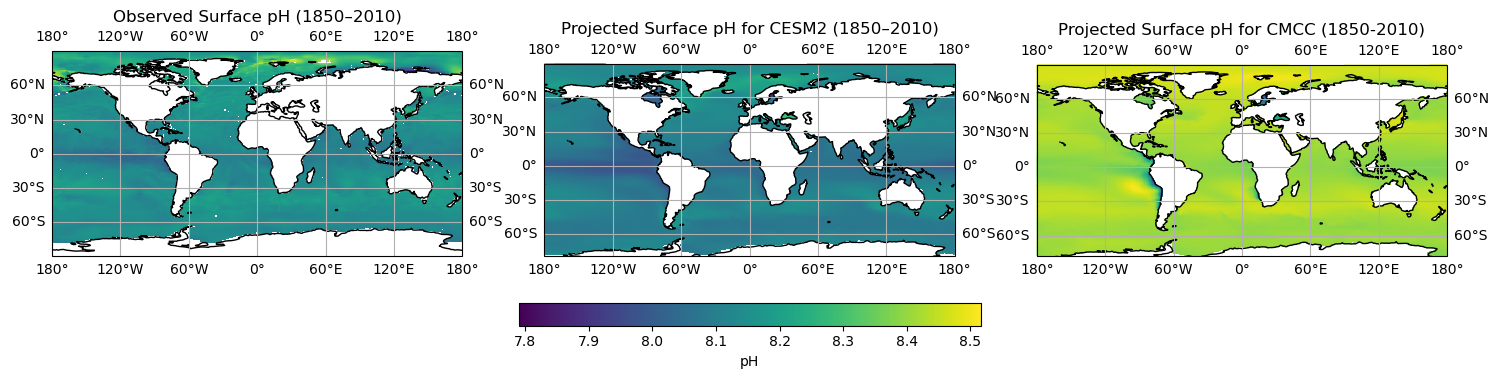

In [4]:

fig, axes = plt.subplots(
    nrows=1, ncols=3,
    figsize=(18, 6),
    subplot_kw={'projection': ccrs.PlateCarree()}
)


mesh1 = axes[0].pcolormesh(hist_mean.longitude, hist_mean.latitude, hist_mean.pHT, shading='auto', cmap='viridis')
axes[0].coastlines()
gl0 = axes[0].gridlines(draw_labels=True)
axes[0].set_title('Observed Surface pH (1850–2010)')


mesh2 = axes[1].pcolormesh(
    CESM2_hist_ph.lon, CESM2_hist_ph.lat, CESM2_hist_ph.ph, shading='auto', cmap='viridis')
axes[1].coastlines()
gl1 = axes[1].gridlines(draw_labels=True)
axes[1].set_title('Projected Surface pH for CESM2 (1850–2010)')


mesh3 = axes[2].pcolormesh(
    CMCC_ESM2_hist_ph.longitude, CMCC_ESM2_hist_ph.latitude, CMCC_ESM2_hist_ph.ph, shading='auto', cmap='viridis')
axes[2].coastlines()
gl1 = axes[2].gridlines(draw_labels=True)
axes[2].set_title('Projected Surface pH for CMCC (1850-2010)')


cbar = fig.colorbar(
    mesh1,                     
    ax=axes,                    
    orientation='horizontal',
    location='bottom',          
    fraction=0.05,              
    pad=0.1,                   
    label='pH'
)
cbar.locator = ticker.AutoLocator()
cbar.update_ticks()

plt.show()


In [6]:
hist_mean

<xarray.Dataset> Size: 2MB
Dimensions:    (lat: 180, lon: 360)
Dimensions without coordinates: lat, lon
Data variables:
    pHT        (lat, lon) float64 518kB nan nan nan nan ... 8.174 8.183 8.2
    longitude  (lat, lon) float64 518kB 20.5 21.5 22.5 ... 377.5 378.5 379.5
    latitude   (lat, lon) float64 518kB -89.5 -89.5 -89.5 ... 89.5 89.5 89.5